In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import mlfast
import testdata
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp1d

In [3]:
plt.rcParams['font.family'] = 'serif'# 'sans-serif'
plt.rcParams['font.serif'] = "STIXGeneral"
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rc("text",usetex=True)
plt.rc("font",family="serif")
plt.rc("font",serif="STIXGeneral")

In [4]:
mag = mlfast.mag_fft.magnification(profile_names=['disk', 'limb1', 'limb2'])

0.1
CPU times: user 1.81 ms, sys: 215 µs, total: 2.03 ms
Wall time: 2.03 ms
CPU times: user 912 ms, sys: 5.91 ms, total: 918 ms
Wall time: 941 ms
CPU times: user 146 ms, sys: 1.58 ms, total: 148 ms
Wall time: 149 ms
CPU times: user 874 µs, sys: 224 µs, total: 1.1 ms
Wall time: 1.15 ms
1.0
CPU times: user 10.9 ms, sys: 1.47 ms, total: 12.3 ms
Wall time: 2.26 ms
CPU times: user 2.03 s, sys: 76.1 ms, total: 2.11 s
Wall time: 948 ms
CPU times: user 126 ms, sys: 246 µs, total: 126 ms
Wall time: 126 ms
CPU times: user 800 µs, sys: 131 µs, total: 931 µs
Wall time: 938 µs
10.0
CPU times: user 15.5 ms, sys: 206 µs, total: 15.7 ms
Wall time: 1.97 ms
CPU times: user 1.89 s, sys: 63.9 ms, total: 1.95 s
Wall time: 948 ms
CPU times: user 137 ms, sys: 720 µs, total: 137 ms
Wall time: 138 ms
CPU times: user 777 µs, sys: 113 µs, total: 890 µs
Wall time: 894 µs


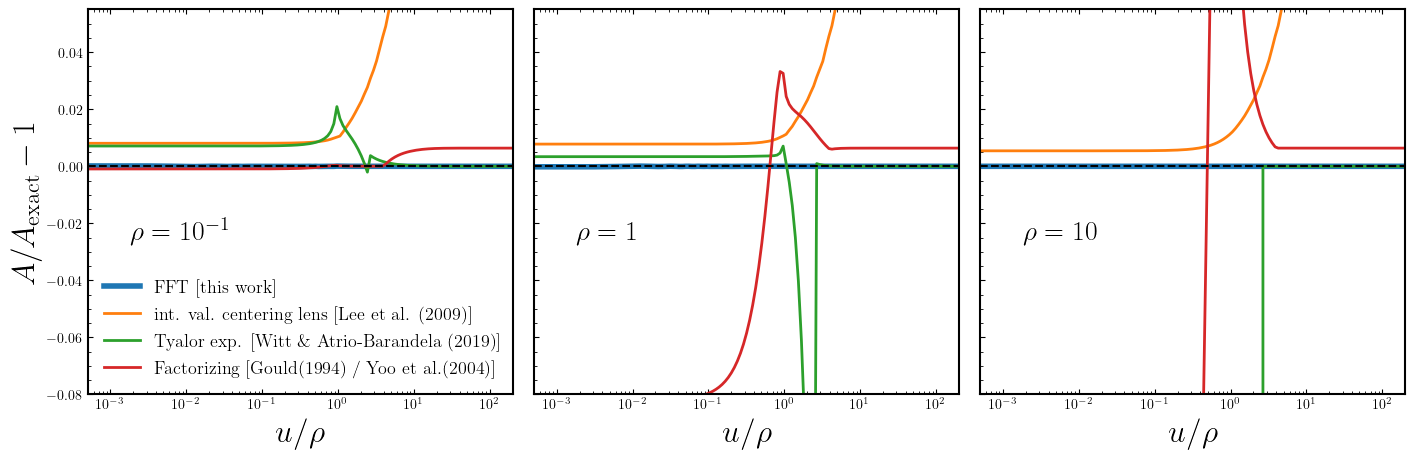

In [5]:
fig, axes = plt.subplots(1,3, figsize=(17, 5))
plt.subplots_adjust(wspace=0.05)

for i in range(3):
    ax = axes[i]
    r = ['1e-1', '1', '10'][i]
    text = [r'$\rho=10^{-1}$', r'$\rho=1$', r'$\rho=10$'][i]
    name = 'limb'
    
    u, rho, a_true = testdata.get_test_data('testdata/%s_%s.txt'%(name, r))
    print(rho)
    %time a_fft = mag.A_limb1(u.copy(), rho)
    %time a_lee = mlfast.mag_lee.A_limb(u.copy(), rho, n1=200, n2=200, order=1)
    %time a_wb  = mlfast.mag_wb.A_limb(u.copy(), rho)
    %time a_g   = mlfast.mag_yoo.A_limb(u.copy(), rho)
    ax.set_xscale('log')
    ax.plot(u/rho, a_fft/a_true-1, lw=4, label='FFT [this work]')
    ax.plot(u/rho, a_lee/a_true-1, lw=2, label='int. val. centering lens [Lee et al. (2009)]')
    ax.plot(u/rho, a_wb /a_true-1, lw=2, label='Tyalor exp. [Witt \& Atrio-Barandela (2019)]')
    ax.plot(u/rho, a_g  /a_true-1, lw=2, label='Factorizing [Gould(1994) / Yoo et al.(2004)]')
    ax.axhline(0.0, color='k', linestyle='--')
    #ax.set_ylim(-0.023, 0.055)
    ax.set_ylim(-0.08, 0.055)
    ax.set_xlim(5e-4, 2e2)
    ax.set_xlabel(r'$u/\rho$', fontsize=23)
    ax.text(0.1, 0.4, text, fontsize=20, transform=ax.transAxes)
    if i>0:
        plt.setp(axes[i].get_yticklabels(), visible=False)

axes[0].legend(frameon=False, fontsize=13)
axes[0].set_ylabel(r'$A/A_{\rm exact}-1$', fontsize=23)
plt.show()